### Part 1. NN from scratch and MNIST 

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [21]:
class Module(object):
    """
    Basically, you can think of a module as of a something (black box)
    which can process `input` data and produce `ouput` data.
    This is like applying a function which is called `forward`:

        output = module.forward(input)

    The module should be able to perform a backward pass: to differentiate the `forward` function.
    More, it should be able to differentiate it if is a part of chain (chain rule).
    The latter implies there is a gradient from previous step of a chain rule.

        gradInput = module.backward(input, gradOutput)
    """
    def __init__ (self):
        self.output = None
        self.gradInput = None
        self.training = True

    def forward(self, input):
        """
        Takes an input object, and computes the corresponding output of the module.
        """
        return self.updateOutput(input)

    def backward(self, input, gradOutput):
        """
        Performs a backpropagation step through the module, with respect to the given input.

        This includes
         - computing a gradient w.r.t. `input` (is needed for further backprop),
         - computing a gradient w.r.t. parameters (to update parameters while optimizing).
        """
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput


    def updateOutput(self, input):
        """
        Computes the output using the current parameter set of the class and input.
        This function returns the result which is stored in the `output` field.

        Make sure to both store the data in `output` field and return it.
        """

        # The easiest case:

        # self.output = input
        # return self.output

        pass

    def updateGradInput(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own input.
        This is returned in `gradInput`. Also, the `gradInput` state variable is updated accordingly.

        The shape of `gradInput` is always the same as the shape of `input`.

        Make sure to both store the gradients in `gradInput` field and return it.
        """

        # The easiest case:

        # self.gradInput = gradOutput
        # return self.gradInput

        pass

    def accGradParameters(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own parameters.
        No need to override if module has no parameters (e.g. ReLU).
        """
        pass

    def zeroGradParameters(self):
        """
        Zeroes `gradParams` variable if the module has params.
        """
        pass

    def getParameters(self):
        """
        Returns a list with its parameters.
        If the module does not have parameters return empty list.
        """
        return []

    def getGradParameters(self):
        """
        Returns a list with gradients with respect to its parameters.
        If the module does not have parameters return empty list.
        """
        return []

    def train(self):
        """
        Sets training mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = True

    def evaluate(self):
        """
        Sets evaluation mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = False

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want
        to have readable description.
        """
        return "Module"

    #A Sequential model is appropriate for a plain stack of 
#layers where each layer has exactly one input tensor and one output tensor.

class Sequential(Module):
    """
         This class implements a container, which processes `input` data sequentially.

         `input` is processed by each module (layer) in self.modules consecutively.
         The resulting array is called `output`.
    """

    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []

    def add(self, module):
        """
        Adds a module to the container.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Basic workflow of FORWARD PASS:

            y_0    = module[0].forward(input)
            y_1    = module[1].forward(y_0)
            ...
            output = module[n-1].forward(y_{n-2})


        Just write a little loop.
        """

        # Your code goes here. ################################################
        self.output = input

        for module in self.modules:
            self.output = module.forward(self.output)

        return self.output

    def backward(self, input, gradOutput):
        """
        Workflow of BACKWARD PASS:

            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)
            gradInput = module[0].backward(input, g_1)


        !!!

        To ech module you need to provide the input, module saw while forward pass,
        it is used while computing gradients.
        Make sure that the input for `i-th` layer the output of `module[i]` (just the same input as in forward pass)
        and NOT `input` to this Sequential module.

        !!!

        """
        # Your code goes here. ################################################

        for i in range(len(self.modules)-1, 0, -1):
            gradOutput = self.modules[i].backward(self.modules[i-1].output, gradOutput)

        self.gradInput = self.modules[0].backward(input, gradOutput)

        return self.gradInput


    def zeroGradParameters(self):
        for module in self.modules:
            module.zeroGradParameters()

    def getParameters(self):
        """
        Should gather all parameters in a list.
        """
        return [x.getParameters() for x in self.modules]

    def getGradParameters(self):
        """
        Should gather all gradients w.r.t parameters in a list.
        """
        return [x.getGradParameters() for x in self.modules]

    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string

    def __getitem__(self,x):
        return self.modules.__getitem__(x)

    def train(self):
        """
        Propagates training parameter through all modules
        """
        self.training = True
        for module in self.modules:
            module.train()

    def evaluate(self):
        """
        Propagates training parameter through all modules
        """
        self.training = False
        for module in self.modules:
            module.evaluate()


class Criterion(object):
    def __init__ (self):
        self.output = None
        self.gradInput = None

    def forward(self, input, target):
        """
            Given an input and a target, compute the loss function
            associated to the criterion and return the result.

            For consistency this function should not be overrided,
            all the code goes in `updateOutput`.
        """
        return self.updateOutput(input, target)

    def backward(self, input, target):
        """
            Given an input and a target, compute the gradients of the loss function
            associated to the criterion and return the result.

            For consistency this function should not be overrided,
            all the code goes in `updateGradInput`.
        """
        return self.updateGradInput(input, target)

    def updateOutput(self, input, target):
        """
        Function to override.
        """
        return self.output

    def updateGradInput(self, input, target):
        """
        Function to override.
        """
        return self.gradInput

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want
        to have readable description.
        """
        return "Criterion"

class Linear(Module):
    """
    A module which applies a linear transformation 
    A common name is fully-connected layer, InnerProductLayer in caffe. 
    
    The module should work with 2D input of shape (n_samples, n_feature).
    """
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()
       
        # This is a nice initialization
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size = n_out)
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        # Your code goes here. ################################################
        # self.output = ...
        self.output = input.dot(self.W.T) + self.b
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        # Your code goes here. ################################################
        # self.gradInput = ...
        self.gradInput = gradOutput@(self.W)
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        # Your code goes here. ################################################
        # self.gradW = ... ; self.gradb = ...
        self.gradW = gradOutput.T.dot(input)
        self.gradb = gradOutput.sum(axis=0)
    
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' %(s[1],s[0])
        return q
    
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()

    def updateOutput(self, input):
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))
        np.subtract(self.output,np.log(np.exp(self.output).sum(axis=1, keepdims=True)), out=self.output)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput - np.exp(self.output) * np.sum(gradOutput, axis=1, keepdims=True)
        return self.gradInput
    def __repr__(self):
        return "LogSoftMax"
    
class ClassNLLCriterion(Criterion):
    def __init__(self):
        a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()
        
    def updateOutput(self, input, target):
        self.output = -np.sum(target * input) / input.shape[0]
        return self.output

    def updateGradInput(self, input, target):
        self.gradInput = -target / input.shape[0]
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterion"
    
def sgd_momentum(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('accumulated_grads', {})
    var_index = 0 
    for currentL_vars, currentL_grads in zip(variables, gradients):
        for current_var, current_grad in zip(currentL_vars, currentL_grads):
            old_grad = state['accumulated_grads'].setdefault(var_index, np.zeros_like(current_grad))
            np.add(config['momentum'] * old_grad, config['learning_rate'] * current_grad, out=old_grad)
            current_var -= old_grad
            var_index += 1

class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()
    def updateOutput(self, input):
        self.output = np.maximum(input, 0)
        return self.output
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(gradOutput , input > 0)
        return self.gradInput
    def __repr__(self):
        return "ReLU"

class ELU(Module):
    def __init__(self, alpha = 1.0):
        super(ELU, self).__init__()
        self.alpha = alpha

    def updateOutput(self, input):
        self.output = np.where(input > 0, input, self.alpha * (np.exp(input) - 1.))
        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.where(input > 0, gradOutput, self.alpha * np.exp(input) * gradOutput)
        return self.gradInput
    
    def __repr__(self):
        return "ELU"

class LeakyReLU(Module):
    def __init__(self, slope = 0.03):
        super(LeakyReLU, self).__init__()
            
        self.slope = slope
        
    def updateOutput(self, input):
        routine = np.maximum if self.slope <= 1. else np.minimum
        self.output = routine(input, input * self.slope)
        return  self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.where(input > 0, gradOutput, self.slope * gradOutput)
        return self.gradInput
    
    def __repr__(self):
        return "LeakyReLU"
    
class SoftPlus(Module):
    def __init__(self):
        super(SoftPlus, self).__init__()
    
    def updateOutput(self, input):
        self.output = np.log(np.exp(input) + 1.)
        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.divide(gradOutput, np.add(np.exp(-input), 1.))
        return self.gradInput
    def __repr__(self):
        return "SoftPlus"
    
    
class BatchNormalization(Module):
    EPS = 1e-4
    def __init__(self, alpha = 0.):
        super(BatchNormalization, self).__init__()
        self.alpha = alpha
        self.moving_av = None
        self.moving_var = None

    def updateMeanVariance(self, batch_mean, batch_variance):
        self.moving_av = batch_mean if self.moving_av is None else self.moving_av
        self.moving_var = batch_variance if self.moving_var is None else self.moving_var

        # moving_average update
        np.multiply(self.moving_av, self.alpha, out=self.moving_av)
        np.multiply(batch_mean, 1-self.alpha, out=batch_mean)
        np.add(self.moving_av, batch_mean, out=self.moving_av)
        # moving_variance
        np.multiply(self.moving_var, self.alpha, out=self.moving_var)
        np.multiply(batch_variance, 1-self.alpha, out=batch_variance)
        np.add(self.moving_var, batch_variance, out=self.moving_var)

    def updateOutput(self, input):
        batch_mean = np.mean(input, axis=0) if self.training else self.moving_av
        batch_variance = np.var(input, axis=0) if self.training else self.moving_var

        self.output = (input - batch_mean) / np.sqrt(batch_variance + self.EPS)
        if self.training:
            self.updateMeanVariance(batch_mean, batch_variance)
        return self.output

    def updateGradInput(self, input, gradOutput):
        batch_mean = np.mean(input, axis=0) if self.training else self.moving_av
        batch_variance = np.var(input, axis=0) if self.training else self.moving_var
        var0 = input - batch_mean
        var1 = np.sum(gradOutput * var0, axis=0)
        var2 = np.sum(gradOutput, axis=0)
        var3 = np.sqrt(batch_variance + self.EPS)
        self.gradInput = gradOutput / var3
        self.gradInput -= var1 * var0 / input.shape[0] / var3 / (batch_variance + self.EPS)
        self.gradInput -= var2 / input.shape[0] / var3
        self.gradInput += var1 * np.sum(var0, 0) / (input.shape[0])**2 / var3**(3/2)
        return self.gradInput

    def __repr__(self):
        return "BatchNormalization"
    
class ChannelwiseScaling(Module):
    """
       Implements linear transform of input y = \gamma * x + \beta
       where \gamma, \beta - learnable vectors of length x.shape[-1]
    """
    def __init__(self, n_out):
        super(ChannelwiseScaling, self).__init__()

        stdv = 1./np.sqrt(n_out)
        self.gamma = np.random.uniform(-stdv, stdv, size=n_out)
        self.beta = np.random.uniform(-stdv, stdv, size=n_out)
        self.gradGamma = np.zeros_like(self.gamma)
        self.gradBeta = np.zeros_like(self.beta)

    def updateOutput(self, input):
        self.output = input * self.gamma + self.beta
        return self.output
        
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.gamma
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        self.gradBeta = np.sum(gradOutput, axis=0)
        self.gradGamma = np.sum(gradOutput*input, axis=0)
    
    def zeroGradParameters(self):
        self.gradGamma.fill(0)
        self.gradBeta.fill(0)
        
    def getParameters(self):
        return [self.gamma, self.beta]
    
    def getGradParameters(self):
        return [self.gradGamma, self.gradBeta]
    
    def __repr__(self):
        return "ChannelwiseScaling"

class Dropout(Module):
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()
        
        self.p = p
        self.mask = None

    def updateOutput(self, input):
        if not self.training:
            self.output = input
            return self.output
        self.mask = np.random.choice(2, input.shape, p=[self.p, (1.0 - self.p)])
        self.output = np.multiply(input, self.mask) / (1 - self.p)
        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(gradOutput, self.mask) / (1 - self.p)
        return self.gradInput

    def __repr__(self):
        return "Dropout"
    
def adam_optimizer(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('m', {})  # first moment vars
    state.setdefault('v', {})  # second moment vars
    state.setdefault('t', 0)  # timestamp
    state['t'] += 1
    for k in ['learning_rate', 'beta1', 'beta2', 'epsilon']:
        assert k in config, config.keys()

    var_index = 0
    lr_t = config['learning_rate'] * np.sqrt(1 - config['beta2'] ** state['t']) / (1 - config['beta1'] ** state['t'])
    for currentL_vars, currentL_grads in zip(variables, gradients):
        for current_var, current_grad in zip(currentL_vars, currentL_grads):
            var_first_moment = state['m'].setdefault(var_index, np.zeros_like(current_grad))
            var_second_moment = state['v'].setdefault(var_index,  np.zeros_like(current_grad))
            np.add(config['beta1'] * var_first_moment, (1 - config['beta1']) * current_grad, out=var_first_moment)
            np.add(config['beta2'] * var_second_moment, (1 - config['beta2']) * np.multiply(current_grad, current_grad), out=var_second_moment)
            current_var -= lr_t * var_first_moment / (np.sqrt(var_second_moment) + config['epsilon'])
            assert var_first_moment is state['m'].get(var_index)
            assert var_second_moment is state['v'].get(var_index)
            var_index += 1

def sgd_momentum(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('accumulated_grads', {})
    var_index = 0 
    for currentL_vars, currentL_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(currentL_vars, currentL_grads):
            old_grad = state['accumulated_grads'].setdefault(var_index, np.zeros_like(current_grad))
            np.add(config['momentum'] * old_grad, config['learning_rate'] * current_grad, out=old_grad)
            current_var -= old_grad
            var_index += 1 

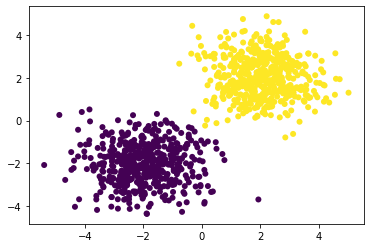

In [4]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

In [5]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

Linear 2 -> 2
LogSoftMax



In [6]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [7]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

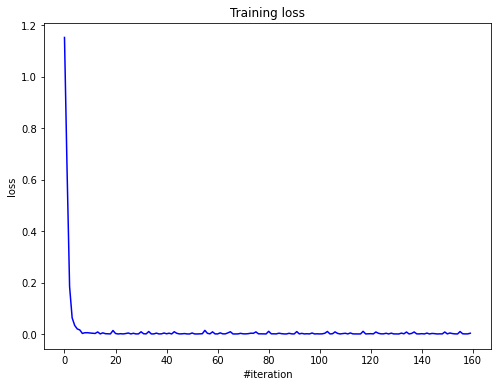

Current loss: 0.002917


In [8]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

In [9]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [10]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [11]:
def one_hot(labels):
    return np.eye(10)[labels]

one_hot_y_train = one_hot(y_train)
one_hot_y_val = one_hot(y_val)
one_hot_y_test = one_hot(y_test)

print('one_hot_y_train',one_hot_y_train.shape)
print('one_hot_y_val',one_hot_y_val.shape)
print('one_hot_y_test',one_hot_y_test.shape)

print('X_train.shape',X_train.shape)
print('X_val.shape',X_val.shape)
print('X_test.shape',X_test.shape)

one_hot_y_train (50000, 10)
one_hot_y_val (10000, 10)
one_hot_y_test (10000, 10)
X_train.shape (50000, 784)
X_val.shape (10000, 784)
X_test.shape (10000, 784)


In [13]:
import copy
def loss_calc(model, x_train, y_train, x_test, y_test, convergence_curves, model_label, adam, n_epoch = 10):
    loss_history = []
    legend = []
    lrs = [optimizer_config['learning_rate'] for i in range(n_epoch)]
    optimizer_cfg = copy.copy(optimizer_config)
    
    start_time = time() # to compare the time for train
    for i in range(n_epoch):
        loss = []
        model.train()
        for x_batch, y_batch in get_batches((x_train, y_train), batch_size):
            # zero the accumulation of the gradients with respect to these parameters, 
            #if any, Otherwise, it does nothing.
            model.zeroGradParameters()
            
            # Forward
            predictions = model.forward(x_batch)
            criterion.forward(predictions, y_batch)

            # Backward
            dp = criterion.backward(predictions, y_batch)
            model.backward(x_batch, dp)
            if adam == True:
                optimizer = adam_optimizer
            else: 
                optimizer = sgd_momentum
            # Update weights  
            optimizer_cfg['learning_rate'] = lrs[i]
            optimizer(model.getParameters(), 
                        model.getGradParameters(),
                        optimizer_cfg,
                        optimizer_state)     
                    
        # calculate loss for test data
        model.evaluate()
        loss = criterion.forward(model.forward(x_test), y_test)
        loss_history.append(loss)

        # plot
        display.clear_output(wait=True)
        plt.figure(figsize=(20, 15))
        plt.title("Test loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        
        
        for curve in convergence_curves.keys():
            plt.plot(convergence_curves[curve][0], label = curve)
            legend.append(curve)
        plt.plot(loss_history, label = model_label)
        legend.append(model_label)
        plt.legend(legend)
        plt.show()
        print('Current loss: %f' % loss)
    convergence_curves[model_label] = (loss_history, time() - start_time)
    return loss_history

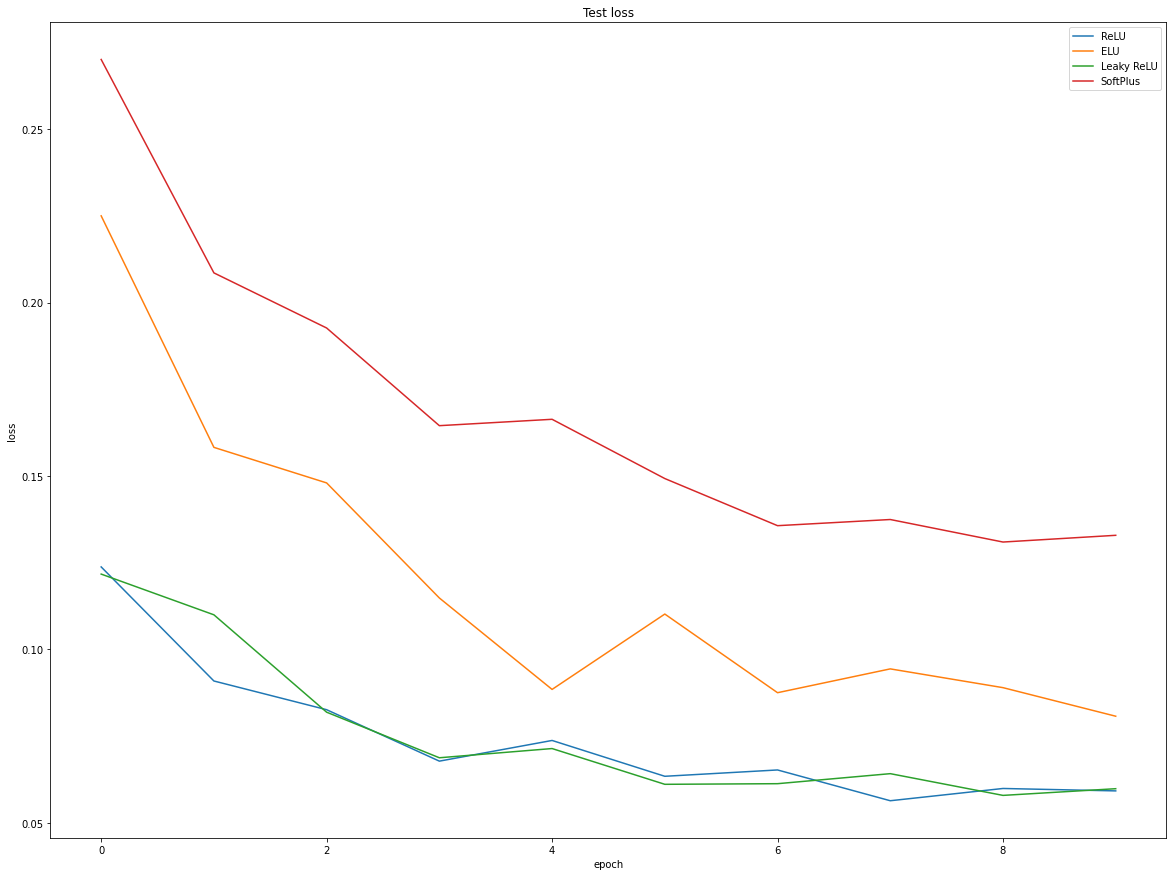

Current loss: 0.132907
time spent for training, in seconds
48 ReLU
53 ELU
52 Leaky ReLU
62 SoftPlus


In [14]:
criterion = ClassNLLCriterion()

# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
batch_size = 128

# ReLU
net_relu = Sequential()
net_relu.add(Linear(X_train.shape[1], X_train.shape[1]))
net_relu.add(ReLU())
net_relu.add(Linear(X_train.shape[1], one_hot_y_train.shape[1]))
net_relu.add(LogSoftMax())

# ELU
net_elu = Sequential()
net_elu.add(Linear(X_train.shape[1], X_train.shape[1]))
net_elu.add(ELU())
net_elu.add(Linear(X_train.shape[1], one_hot_y_train.shape[1]))
net_elu.add(LogSoftMax())

# Leacky ReLU
net_leakrelu = Sequential()
net_leakrelu.add(Linear(X_train.shape[1], X_train.shape[1]))
net_leakrelu.add(LeakyReLU())
net_leakrelu.add(Linear(X_train.shape[1], one_hot_y_train.shape[1]))
net_leakrelu.add(LogSoftMax())

# softplus
net_soft = Sequential()
net_soft.add(Linear(X_train.shape[1], X_train.shape[1]))
net_soft.add(SoftPlus())
net_soft.add(Linear(X_train.shape[1], one_hot_y_train.shape[1]))
net_soft.add(LogSoftMax())

convergence_curves = {}

loss_calc(net_relu, X_train, one_hot_y_train, X_test, one_hot_y_test, convergence_curves, "ReLU", adam = False)
loss_calc(net_elu, X_train, one_hot_y_train, X_test, one_hot_y_test, convergence_curves, "ELU",adam = False)
loss_calc(net_leakrelu, X_train, one_hot_y_train, X_test, one_hot_y_test, convergence_curves, "Leaky ReLU",adam = False)
loss_calc(net_soft, X_train, one_hot_y_train, X_test, one_hot_y_test,convergence_curves,"SoftPlus",adam = False)

print("time spent for training, in seconds")
for key in convergence_curves.keys():
    print(f"{convergence_curves[key][1]:.0f} {key}")

In [15]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

x_train = X_train.reshape((X_train.shape[0], -1))
x_test = X_test.reshape((X_test.shape[0], -1))
y_train0 = y_train
y_test0 = y_test
y_train = one_hot(y_train)

y_test = one_hot(y_test)

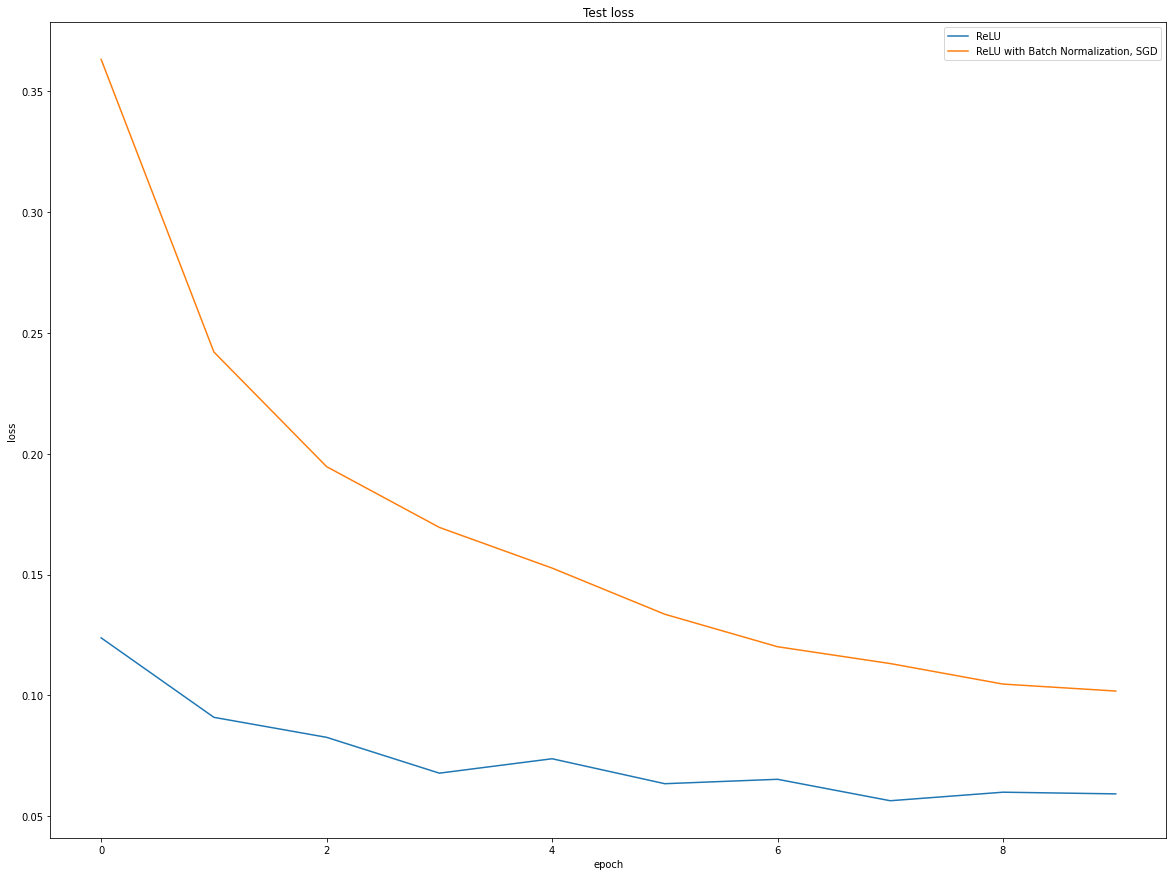

Current loss: 0.101802


[0.3631255135870659,
 0.24208561937286463,
 0.19463854622341636,
 0.16950765137540438,
 0.15267807704677824,
 0.13357530350936847,
 0.12013333802312749,
 0.11317251431798443,
 0.1046797540857738,
 0.10180190546796469]

In [22]:
batch_size = 128

netBatchNorm_Relu = Sequential()
netBatchNorm_Relu.add(Linear(x_train.shape[1], x_train.shape[1]))
netBatchNorm_Relu.add(BatchNormalization(alpha=0.5))
netBatchNorm_Relu.add(ChannelwiseScaling(n_out=x_train.shape[1]))
netBatchNorm_Relu.add(ReLU())
netBatchNorm_Relu.add(Linear(x_train.shape[1], y_train.shape[1]))
netBatchNorm_Relu.add(LogSoftMax())

cc = convergence_curves
convergence_curves = {}
convergence_curves["ReLU"] = cc["ReLU"]
print(convergence_curves)
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9}
optimizer_state = {}
loss_calc(netBatchNorm_Relu, x_train, y_train, x_test, y_test, convergence_curves,  "ReLU with Batch Normalization, SGD", adam = False)


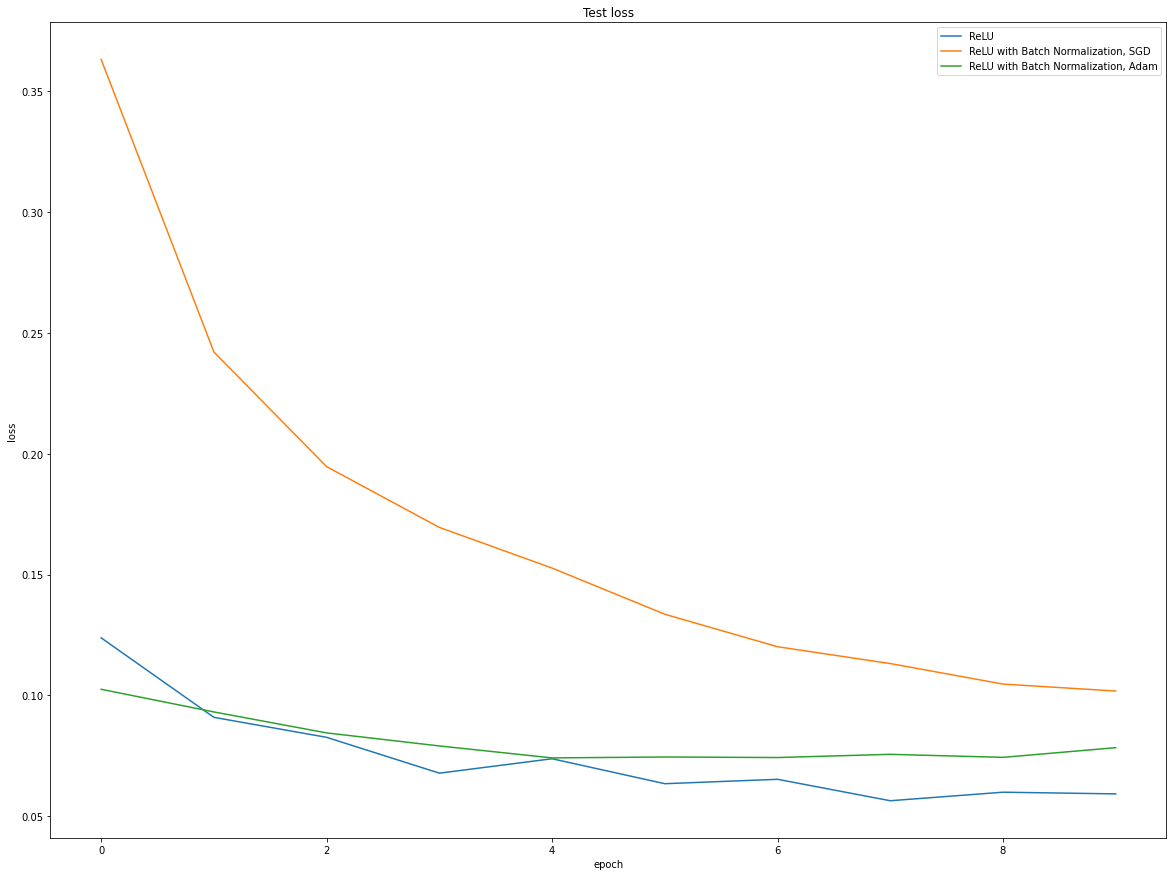

Current loss: 0.078370


[0.1025249836395503,
 0.09315405465963357,
 0.08447628610497018,
 0.07908312645714395,
 0.07413289038436344,
 0.07450496324867026,
 0.07428644065453689,
 0.07561667766843065,
 0.07436135811263707,
 0.07836960552447166]

In [23]:
optimizer_config = {'learning_rate' : 1e-3, 'beta1':0.1, 'beta2':0.95, 'epsilon': 1e-6}
loss_calc(netBatchNorm_Relu, x_train, y_train, x_test, y_test, convergence_curves,  "ReLU with Batch Normalization, Adam", adam = True)




In [24]:
def accuracy(prediction, label):
    pred = np.argmax(prediction, axis = -1)
    return 1 - len(np.nonzero(label-pred)[0])/len(label)

In [25]:
pred_test_relu = net_relu.forward(x_test)
test_loss_relu = criterion.forward(pred_test_relu, one_hot_y_test)
test_acc_relu = accuracy(pred_test_relu,np.argmax(one_hot_y_test,axis = -1))

print('relu test loss: ', test_loss_relu)
print('relu test accuracy: ', test_acc_relu)

pred_test_elu = net_elu.forward(x_test)
test_loss_elu = criterion.forward(pred_test_elu, one_hot_y_test)
test_acc_elu = accuracy(pred_test_elu,np.argmax(one_hot_y_test,axis = -1))


print('elu test loss: ', test_loss_elu)
print('elu test accuracy: ', test_acc_elu)

pred_test_leakrelu = net_leakrelu.forward(x_test)
test_loss_leakrelu = criterion.forward(pred_test_leakrelu, one_hot_y_test)
test_acc_leakrelu = accuracy(pred_test_leakrelu,np.argmax(one_hot_y_test,axis = -1))

print('leakrelu test loss: ', test_loss_leakrelu)
print('leakrelu test accuracy: ', test_acc_leakrelu)

pred_test_soft = net_soft.forward(x_test)
test_loss_soft = criterion.forward(pred_test_soft, one_hot_y_test)
test_acc_soft = accuracy(pred_test_soft, np.argmax(one_hot_y_test,axis = -1))

print('softPlus test loss: ', test_loss_soft)
print('softPlus test accuracy: ', test_acc_soft)


pred_test_BatchNormRelu = netBatchNorm_Relu.forward(x_test)
test_loss_BatchNormRelu = criterion.forward(pred_test_BatchNormRelu, one_hot_y_test)
test_acc_BatchNormRelu = accuracy(pred_test_BatchNormRelu, np.argmax(one_hot_y_test,axis = -1))

print('Relu with BatchNorm test loss: ', test_loss_BatchNormRelu)
print('Relu with BatchNorm test accuracy: ', test_acc_BatchNormRelu)




relu test loss:  0.05924800910939017
relu test accuracy:  0.9832
elu test loss:  0.08076964962051283
elu test accuracy:  0.9763
leakrelu test loss:  0.059879723339686566
leakrelu test accuracy:  0.9839
softPlus test loss:  0.13290672440405749
softPlus test accuracy:  0.9617
Relu with BatchNorm test loss:  0.07836960552447166
Relu with BatchNorm test accuracy:  0.9789


In [26]:
class ImgTransformation(object):
    def __init__(self):
        self.rotation_routine = transforms.Compose([
            transforms.ToPILImage(),
        ])
    
    def __call__(self, img):
        return np.array(self.rotation_routine(img))

In [31]:
import torch
import torchvision
from torch import nn
from torch import optim
from torchvision import transforms
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau 

n_epochs = 20

class DatasetMNIST(Dataset):
    def __init__(self, data, labels):
        self.data, self.labels = data, labels
        self.img_transformation = ImgTransformation()
        
        self.side = int(self.data.shape[1]**.5)

    def __len__(self):
        return len(self.data) 

    def __getitem__(self, index):

        image = self.data[index].astype(np.float32)
        label = self.labels[index]

        return image, label


train_loader = torch.utils.data.DataLoader(DatasetMNIST(x_train, y_train0), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(DatasetMNIST(x_test, y_test0), batch_size=batch_size, shuffle=False)

model = nn.Sequential(
    nn.Linear(x_train.shape[1], 256),
    nn.BatchNorm1d(256, momentum=0.5),
    nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(256, y_train0.shape[0]),
    nn.LogSoftmax(dim=1)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
#scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2)

best_accuracy = 0
for e in range(n_epochs):
    running_loss = 0
    model.train()
    for images, labels in train_loader:

        optimizer.zero_grad()
        output = model(images.to(device))
        loss = criterion(output, labels.to(device))
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        model.eval()
        preds = np.argmax(model(torch.Tensor(x_test).to(device)).detach().cpu().numpy(), axis=1)
        accuracy = (preds == y_test0).mean()
        print(f"Epoch {e} Test acuracy with SGD :{100*accuracy:.3f}%, Training loss:{running_loss/len(train_loader):.3f}")


Epoch 0 Test acuracy with SGD :90.680%, Training loss:2.304
Epoch 1 Test acuracy with SGD :92.920%, Training loss:0.385
Epoch 2 Test acuracy with SGD :93.850%, Training loss:0.294
Epoch 3 Test acuracy with SGD :94.300%, Training loss:0.254
Epoch 4 Test acuracy with SGD :94.980%, Training loss:0.230
Epoch 5 Test acuracy with SGD :95.130%, Training loss:0.208
Epoch 6 Test acuracy with SGD :95.370%, Training loss:0.196
Epoch 7 Test acuracy with SGD :95.710%, Training loss:0.183
Epoch 8 Test acuracy with SGD :95.930%, Training loss:0.171
Epoch 9 Test acuracy with SGD :96.000%, Training loss:0.164
Epoch 10 Test acuracy with SGD :96.300%, Training loss:0.157
Epoch 11 Test acuracy with SGD :96.330%, Training loss:0.147
Epoch 12 Test acuracy with SGD :96.380%, Training loss:0.145
Epoch 13 Test acuracy with SGD :96.650%, Training loss:0.138
Epoch 14 Test acuracy with SGD :96.470%, Training loss:0.132
Epoch 15 Test acuracy with SGD :96.980%, Training loss:0.128
Epoch 16 Test acuracy with SGD :96

#### Relu+Batchnorm applied calucation gave almost the same results (accuracy = 97%), which calculated with torch